# Milestone 2 - CasierVert952

## Idea of project

# 🔴 TODO : Small text expliquant vite fait le projet 🔴


## Data

This data analysis will be conduct on multiple available datasets. 

- Data about beers come from two different beers rating websites :

    - BeerAdvocate
    - RateBeer

- External data about politics coming from ALBERTO websites :

    - blabla (link1)
    - blabla (link2)

> *In the following: BeerAdvocate will be abbreviated as BA and RateBeer as RB.*

> *For improved readability, the complex and long functions developed for this analysis have been moved to ```helpers.py```. We import these functions into the relevant cells as needed.*

## 0. Initial configuration

### 0.1 Data preprocessing

In this phase, we will start by demonstrating how we transformed the ```TXT``` ratings files (for both BA and RB) into CSV format. Next, we will merge the various data files and rename the columns to create a dataframes containing all available feature for each of the datasets. Afterward we will clean and modify some features such as dates and locations to meet our needs. Finally, we will save the cleaned data into ```CSV``` files to be able to load them quickly.

This step can be found on [data_preprocessing.ipynb](data_preprocessing.ipynb), which has to be entirely executed once to be able to run the following cells.

The ```data``` directory should now look like this :

```
data/
├── BeerAdvocate
│   ├── beers.csv
│   ├── breweries.csv
│   ├── users.csv
│   ├── ratings.csv
│   └── BA_cleaned.csv
│
└── RateBeer
    ├── beers.csv
    ├── breweries.csv
    ├── users.csv
    ├── ratings.csv
    └── RB_cleaned.csv
```

### 0.2 Importation of libraries and golbal variable declarations

In [1]:
# import the basic requiered libraries
import os
import csv
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# path variables
BA_DATA_PATH = "data/BeerAdvocate/"
RB_DATA_PATH = "data/RateBeer/"

import importlib
import helpers
importlib.reload(helpers)


<module 'helpers' from 'c:\\Users\\41774\\Documents_ordi\\GitHub\\ada-2024-project-casiervert952\\helpers.py'>

## 1. Data loading and visualization

### 1.1 Loading cleaned data

The preprocessing task having already been done, the cleaned data just has to be loaded.

In [2]:
# create Dataframes for the BA cleaned data
s_time = time.time()
BA_cleaned = pd.read_csv(BA_DATA_PATH + 'BA_cleaned.csv', low_memory=False)
e_time = time.time()
print("Loading of BA data ended in " + str(e_time - s_time) + " seconds.")

# create Dataframes for the RB cleaned data
s_time = time.time()
RB_cleaned = pd.read_csv(RB_DATA_PATH + 'RB_cleaned.csv', low_memory=False)
e_time = time.time()
print("Loading of RB data ended in " + str(e_time - s_time) + " seconds.")

# loading extra data useful for "Data exploration"
BA_beers = pd.read_csv(BA_DATA_PATH + 'beers.csv')
BA_breweries = pd.read_csv(BA_DATA_PATH + 'breweries.csv')
BA_users = pd.read_csv(BA_DATA_PATH + 'users.csv')
RB_beers = pd.read_csv(RB_DATA_PATH + 'beers.csv')
RB_breweries = pd.read_csv(RB_DATA_PATH + 'breweries.csv')
RB_users = pd.read_csv(RB_DATA_PATH + 'users.csv')

Loading of BA data ended in 47.67070269584656 seconds.
Loading of RB data ended in 33.80687689781189 seconds.


### 1.2 Data visualization

The following illustrates the structure of our data after preprocessing. In the future analysis, we will create derived DataFrames from ```BA_cleaned``` and ```RB_cleaned``` by copying them and then, removing, modifying, and adding features to these copies as needed.

In [3]:
# display 3 samples of the BA dataset
print("Visualization of BA :")
display(BA_cleaned.sample(3).T)

# display 3 samples of the RB dataset
print("\nVisualization of RB :")
display(RB_cleaned.sample(3).T)

Visualization of BA :


,3117050,2417952,7464674
rating_date,03-2013,08-2013,05-2016
rating_appearance,NaN,NaN,3.75
rating_aroma,NaN,NaN,3.5
rating_palate,NaN,NaN,3.75
rating_taste,NaN,NaN,3.75
rating_overall,NaN,NaN,3.75
rating,3.5,4.25,3.69
beer_id,12322,91224,143339
beer_name,Mojo IPA,SideKick Extra Pale Ale,OCP (Oatmeal Cream Pie)
beer_style,American IPA,American Pale Ale (APA),American Brown Ale



Visualization of RB :


,4427836,5124632,940096
rating_date,07-2004,07-2015,03-2017
rating_appearance,3,5,3
rating_aroma,7,7,8
rating_palate,4,4,4
rating_taste,7,8,9
rating_overall,15,15,18
rating,3.6,3.9,4.2
beer_id,33198,347068,480361
beer_name,Ommegang Witte,Land Grant One Goal One Ryed,Hill Farmstead Double Nelson
beer_style,Witbier,American Pale Ale,Imperial IPA


> *Here, it can be seen that there is the user's information and his rating on a particular beer. Attached to that, there is a variety of data about the beer characteristics and a varity of information about its corresponding brewery. It can also be seen that, sometimes, the fields are empty (NaN).*

## 2. Data exploration of the two beers' datasets 

Indeed, we are given two different but very similar datasets to perform our analysis. Let's begin by examining them to determine the best approach: using one dataset, combining both, or creating a blend of the two.


### 2.1 Sizes

We will first look into their size.

In [4]:
# print sizes of each Dataframe for both datasets.

print("BA :")
print("   Number of ratings   : " + str(BA_cleaned.shape[0]))
print("   Number of beers     : " + str(BA_beers.shape[0]))
print("   Number of breweries : " + str(BA_breweries.shape[0]))
print("   Number of users     : " + str(BA_users.shape[0]))

print("\nRB :")
print("   Number of ratings   : " + str(RB_cleaned.shape[0]))
print("   Number of beers     : " + str(RB_beers.shape[0]))
print("   Number of breweries : " + str(RB_breweries.shape[0]))
print("   Number of users     : " + str(RB_users.shape[0]))

BA :
   Number of ratings   : 8392192
   Number of beers     : 280823
   Number of breweries : 16758
   Number of users     : 153704

RB :
   Number of ratings   : 7123070
   Number of beers     : 442081
   Number of breweries : 24189
   Number of users     : 70174


> *The RB dataset contains more data on different beers and breweries, but less users than the BA one. Both datasets have around 7 millions user's ratings, which seems at first sight enough to perfom our analysis.*

### 2.2 Missing values

We will check how many value are missing the features columns. It will help us to decide what to remove during the "Data refinement" phase.

In [5]:
# compute missing values by columns
missing_count_BA = BA_cleaned.isna().sum()
missing_percentage_BA = (missing_count_BA / len(BA_cleaned)) * 100
missing_count_RB = RB_cleaned.isna().sum()
missing_percentage_RB = (missing_count_RB / len(RB_cleaned)) * 100

# put results in a dataframe
missing_data_BA = pd.DataFrame({
    'Column': BA_cleaned.columns,
    'Missing Values (BA)': missing_count_BA,
    '% (BA)': missing_percentage_BA
})
missing_data_RB = pd.DataFrame({
    'Column': RB_cleaned.columns,
    'Missing Values (RB)': missing_count_RB,
    '% (RB)': missing_percentage_RB
})

# sort by "%"
missing_data_BA = missing_data_BA.sort_values(by='% (BA)', ascending=False)
missing_data_RB = missing_data_RB.sort_values(by='% (RB)', ascending=False)

# print results
display(missing_data_BA, missing_data_RB)

,Column,Missing Values (BA),% (BA)
beer_avg_matched_valid_ratings,beer_avg_matched_valid_ratings,7464671,88.947810
beer_zscore,beer_zscore,7436327,88.610068
beer_bros_score,beer_bros_score,5283785,62.960726
rating_aroma,rating_aroma,3622979,43.170831
rating_palate,rating_palate,3622979,43.170831
rating_taste,rating_taste,3622979,43.170831
rating_overall,rating_overall,3622979,43.170831
rating_appearance,rating_appearance,3622979,43.170831
breweries_state,breweries_state,1481852,17.657508
user_state,user_state,1089052,12.976967


,Column,Missing Values (RB),% (RB)
beer_zscore,beer_zscore,6102391,85.670799
beer_avg_matched_valid_ratings,beer_avg_matched_valid_ratings,6102391,85.670799
breweries_state,breweries_state,4111124,57.715620
user_state,user_state,4014385,56.357512
overall_score,overall_score,861022,12.087794
style_score,style_score,844833,11.860518
user_country,user_country,203670,2.859301
user_location,user_location,203670,2.859301
beer_abv,beer_abv,174964,2.456300
user_join_date,user_join_date,2625,0.036852


> *Here, we see that our data of interest (mainly user_location, breweries locations and ratings) have some missing values in the user_location column, meaning these ratings will have to get discarded later. Additionnaly, we see that breweries_state and user_state are sometimes missing but this is normal because sometimes the user might not be located in the US (state not precised in this case).*

### 2.3 Country Representation

To be able to have a proper study on the influence of politics on beer appreciation, we need to investigate the representation of countries in both datasets. This will assist us in selecting the most appropriate political datasets for our final analyses.

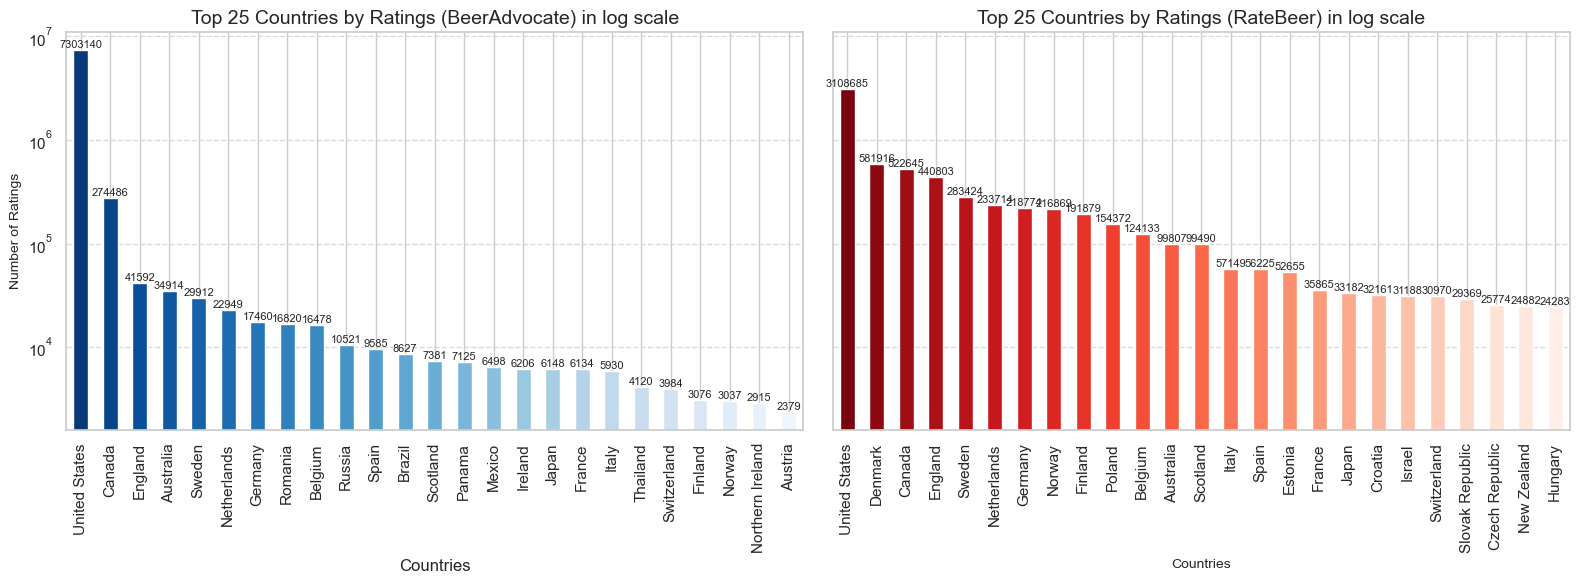

In [6]:
from helpers import ploting_country_representation

# compute number of ratings per country
BA_count_per_country = BA_cleaned.groupby('user_country').size().nlargest(25)
RB_count_per_country = RB_cleaned.groupby('user_country').size().nlargest(25)

ploting_country_representation(BA_count_per_country, RB_count_per_country, 'log')

In [7]:
# top 10 country ratings with precise values
country_comparison = pd.DataFrame({
    'Country (BA)': BA_count_per_country.index,
    '# of Ratings (BeerAdvocate)': BA_count_per_country.values,
    '% of Ratings (BeerAdvocate)': np.round(BA_count_per_country.values / len(BA_cleaned) * 100, 2),
    'Country (RB)': RB_count_per_country.index,
    '# of Ratings (RateBeer)': RB_count_per_country.reindex(RB_count_per_country.index, fill_value=0).values,
    '% of Ratings (RateBeer)': np.round(RB_count_per_country.reindex(RB_count_per_country.index, fill_value=0).values / len(RB_cleaned) * 100, 2)
})
country_comparison.index = range(1, len(country_comparison) + 1)
country_comparison.head(10)

,Country (BA),# of Ratings (BeerAdvocate),% of Ratings (BeerAdvocate),Country (RB),# of Ratings (RateBeer),% of Ratings (RateBeer)
1,United States,7303140,87.02,United States,3108685,43.64
2,Canada,274486,3.27,Denmark,581916,8.17
3,England,41592,0.50,Canada,522645,7.34
4,Australia,34914,0.42,England,440803,6.19
5,Sweden,29912,0.36,Sweden,283424,3.98
6,Netherlands,22949,0.27,Netherlands,233714,3.28
7,Germany,17460,0.21,Germany,218774,3.07
8,Romania,16820,0.20,Norway,216869,3.04
9,Belgium,16478,0.20,Finland,191879,2.69
10,Russia,10521,0.13,Poland,154372,2.17


> *Here, we see that most of the ratings for both sites comes from USA and Canada first and then from European countries. This means that the project will focus mainly on politics from US/Canada and European countries. To be sure that we are not losing too much data from other continents, we will compute the percentage of ratings coming from US/Canada together and Europe together.*

In [8]:
# list with countries in north america
north_america = [
    "United States", "Canada"
]

# compute total % of ratings from north America for BeerAdvocate
na_BA_percentage = country_comparison[country_comparison['Country (BA)'].isin(north_america)]['% of Ratings (BeerAdvocate)'].sum()
print('Total % of ratings (BeerAdvocate) from North America countries:', round(na_BA_percentage,1), '%')

# compute total % of ratings from north America for RateBeer
na_RB_percentage = country_comparison[country_comparison['Country (RB)'].isin(north_america)]['% of Ratings (RateBeer)'].sum()
print('Total % of ratings (RateBeer) from North America countries:', round(na_RB_percentage,1), '%')


# list with countries in europe
european_countries = [
    "Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium",
    "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark",
    "Estonia", "Finland", "France", "Georgia", "Germany", "Greece", "Hungary", "Iceland",
    "Ireland", "Italy", "Kazakhstan", "Kosovo", "Latvia", "Liechtenstein", "Lithuania",
    "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia",
    "Norway", "Poland", "Portugal", "Romania", "Russia", "San Marino", "Serbia", "Slovakia",
    "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey", "Ukraine", "England",
    "Vatican City"
]

# compute total % of ratings from Europe for BeerAdvocate
BA_european_percentage = country_comparison[country_comparison['Country (BA)'].isin(european_countries)]['% of Ratings (BeerAdvocate)'].sum()
print('\nTotal % of ratings (BeerAdvocate) from European countries:', round(BA_european_percentage,1), '%')

# compute total % of ratings from Europe for RateBeer
RB_european_percentage = country_comparison[country_comparison['Country (RB)'].isin(european_countries)]['% of Ratings (RateBeer)'].sum()
print('Total % of ratings (RateBeer) from European countries:', round(RB_european_percentage,1), '%')

# compute and print total loss of ratings coming from other continents for BeerAdvocate
BA_total_loss = 100 - na_BA_percentage - BA_european_percentage
print ("\n\nTotal loss of ratings from other continents for BeerAdvocate :", round(BA_total_loss,1), '%' )

# compute and print total loss of ratings coming from other continents for RateBeer
RB_total_loss = 100 - na_RB_percentage - RB_european_percentage
print ("Total loss of ratings from other continents for RateBeer :", round(RB_total_loss,1), '%' )

Total % of ratings (BeerAdvocate) from North America countries: 90.3 %
Total % of ratings (RateBeer) from North America countries: 51.0 %

Total % of ratings (BeerAdvocate) from European countries: 2.3 %
Total % of ratings (RateBeer) from European countries: 38.7 %


Total loss of ratings from other continents for BeerAdvocate : 7.4 %
Total loss of ratings from other continents for RateBeer : 10.3 %


# 🔴 qqchose a run faux 🔴
**Observations for BeerAdvocate :**

    - 96% of ratings from North America, 92.5% from US
    - 2.5% of ratings from Europe
    - 1.5% of ratings from other continents

> *This mean that our first approach will be to see if the political orientation of each US state has an impact on beer ratings (here we will consider Canada as the 51st US state, taking the whole countries political orientation into account). This dataset might not be adequate for Europe since it only represents 2.5% of the dataframe.*


**Observations for RateBeer :**

    - 52.5% of ratings from North America, 44.9% from US
    - 39.9% of ratings from Europe
    - 7.6% of ratings from other continents

> *This means that for this dataframe we will be able to have a proper analysis about US/Canada and Europe since they are both around 45%. However, here, the data that won't be used is about 7.6% which is pretty significant.*

### 2.4 Ratings distribution over users

It is also interesting to explore the quantity of ratings that each user has published. Do we give more importance to regular users than to occasional ones ? Are users who have thousands and thousands of ratings relevant ? Are theses users biasing our result ?

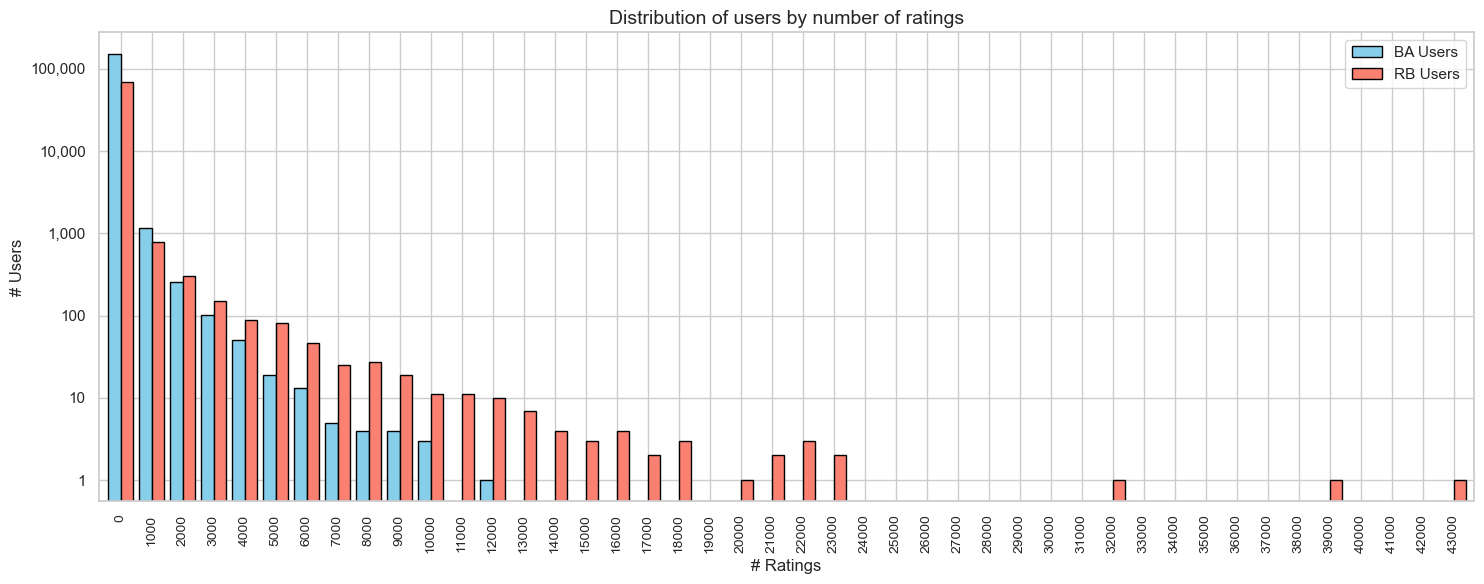

In [9]:
from helpers import ploting_user_ratings_distribution

# Computing the #ratings by users, and grouping them in bins of size 1000
BA_ratings_by_user = BA_cleaned.groupby('user_id').size().reset_index(name='#ratings')
BA_ratings_bins = pd.cut(BA_ratings_by_user['#ratings'], bins=np.arange(0, BA_ratings_by_user['#ratings'].max() + 1000, 1000))
BA_ratings_bins = BA_ratings_bins.value_counts().sort_index()

RB_ratings_by_user = RB_cleaned.groupby('user_id').size().reset_index(name='#ratings')
RB_ratings_bins = pd.cut(RB_ratings_by_user['#ratings'], bins=np.arange(0, RB_ratings_by_user['#ratings'].max() + 1000, 1000))
RB_ratings_bins = RB_ratings_bins.value_counts().sort_index()

# Only show the minial value of the bins in the graph
BA_ratings_bins.index = [f'{int(bin.left)}' for bin in BA_ratings_bins.index]
RB_ratings_bins.index = [f'{int(bin.left)}' for bin in RB_ratings_bins.index]

# Ploting the #ratings by users data
ploting_user_ratings_distribution(BA_ratings_bins, RB_ratings_bins)

# 🔴 TODO GROUP 🔴

### 2.5 Ratings distribution over months

In our analyses, we will compare political properties with beer properties over time. It is important to examine the distribution of ratings across different months to ensure the relevance and validity of our results.

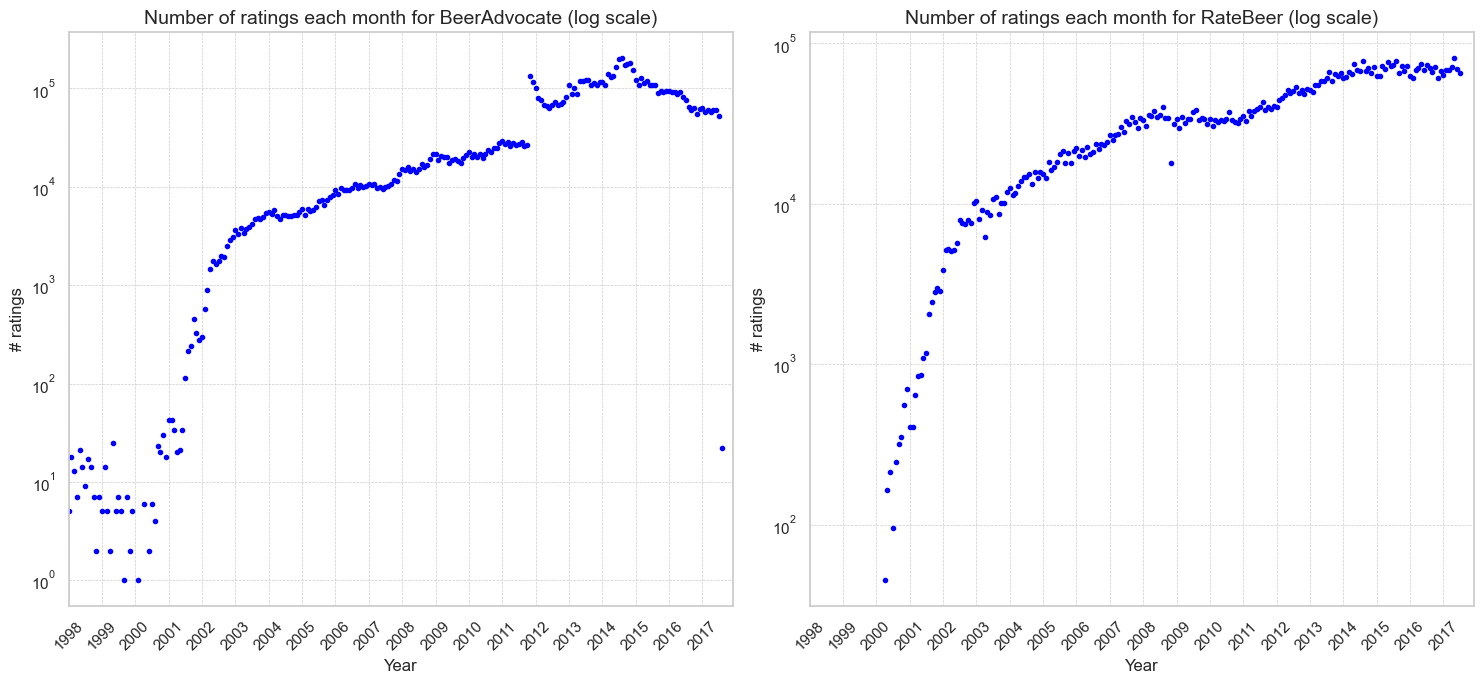

In [10]:
from helpers import ploting_ratings_by_month

# compute the #ratings by month
BA_ratings_by_month = BA_cleaned.groupby('rating_date').size().reset_index(name='#ratings').sort_index()
BA_ratings_by_month['rating_date'] = pd.to_datetime(BA_ratings_by_month['rating_date'], format='%m-%Y')

RB_ratings_by_month = RB_cleaned.groupby('rating_date').size().reset_index(name='#ratings').sort_index()
RB_ratings_by_month['rating_date'] = pd.to_datetime(RB_ratings_by_month['rating_date'], format='%m-%Y')

# plot the #ratings by months data
ploting_ratings_by_month(BA_ratings_by_month, RB_ratings_by_month, "log")

**For BeerAdvocate :**

> *Before 2002, the number of user ratings each month is very low (under 1000), which may pose problems for conducting a reliable statistical analysis. On the contrary, starting from 2007, there are more than 10,000 ratings per month, providing a solid foundation for more precise analysis. It can also be noted that starting from 2012, the data shows significant volatility, with the number of ratings varying greatly from one month to the next one.*

**For RateBeer :**

> *Before 2003, there is limited data, but after that year, the graph shows a consistent increase of data every month. This suggests that we can have more confidence in our results for the later years.*

## 3. US Politics external datasets processing

As we saw before, the majority of the ratings came from the USA for both websites. Thus, the first analysis will be on US politics.

### 3.1 Data loading

In [11]:
# create a dataframe containing the number of votes for each candidate for each US state
us_pres_df = pd.read_csv('./data/US president/1976-2020-president.csv')
us_pres_df = us_pres_df.loc[us_pres_df.year>1998].reset_index()

# get the % of vote
us_pres_df['vote_percent']=us_pres_df['candidatevotes']/us_pres_df['totalvotes']*100

# print to get a look
us_pres_df.head()

,index,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,vote_percent
0,2042,2000,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,False,941173,1666272,20210113,NaN,REPUBLICAN,56.483755
1,2043,2000,ALABAMA,AL,1,63,41,US PRESIDENT,"GORE, AL",DEMOCRAT,False,692611,1666272,20210113,NaN,DEMOCRAT,41.566503
2,2044,2000,ALABAMA,AL,1,63,41,US PRESIDENT,NaN,INDEPENDENT,False,25896,1666272,20210113,NaN,OTHER,1.554128
3,2045,2000,ALABAMA,AL,1,63,41,US PRESIDENT,"BROWNE, HARRY",LIBERTARIAN,False,5893,1666272,20210113,NaN,LIBERTARIAN,0.353664
4,2046,2000,ALABAMA,AL,1,63,41,US PRESIDENT,NaN,NaN,True,699,1666272,20210113,NaN,OTHER,0.041950


Here we can see that there are multiple candidates for the elections which means that we won't be able to take 100% of the votes because we will only be considering Republican votes or Democrat votes.

### 3.2 Computing Republicans score percentage by state/year

In [12]:
# extract only the republican results
republican_score=us_pres_df.loc[us_pres_df['party_simplified']=='REPUBLICAN'].copy().reset_index()

# create a dataframe with row=states and column=election year.
rep_year_score_df=republican_score.pivot_table(index='state_po',columns='year',values='vote_percent',aggfunc='sum')

# add a column with average percent result over 2000-2020
rep_year_score_df['Average']=rep_year_score_df.mean(axis=1)

# display the top 5 most republican states over 6 elections
rep_year_score_df.sort_values(by='Average',ascending=False).head(5)

year,2000,2004,2008,2012,2016,2020,Average
state_po,,,,,,,
WY,69.222743,68.739569,64.713775,68.193585,67.398411,69.499790,67.961312
OK,60.307852,65.570402,65.645081,66.772320,65.322865,65.373272,64.831965
ID,67.170439,68.390945,61.517091,64.529783,59.261432,63.837565,64.117876
UT,66.830143,71.535948,62.583870,72.790533,45.540817,58.129839,62.901858
AL,56.483755,62.460690,60.316913,60.545822,62.083092,62.031643,60.653653


> We see that the states that vote much more republican than democrat are Wyoming, Oklahoma,Idaho, Utah and Alabama

### 3.3 Computing Democrats score percentage by state/year

In [13]:
# extract only the democrat results
democrat_score=us_pres_df.loc[us_pres_df['party_simplified']=='DEMOCRAT'].copy().reset_index()

# create a dataframe with row=states and column=election year.
dem_year_score_df=democrat_score.pivot_table(index='state_po',columns='year',values='vote_percent',aggfunc='sum')

# add a column with average percent result over 2000-2020
dem_year_score_df['Average']=dem_year_score_df.mean(axis=1)

# display the top 5 most democrat states over 6 elections
dem_year_score_df.sort_values(by='Average',ascending=False).head()

democrat_score['state'].unique()


array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE',
       'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA',
       'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA',
       'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE',
       'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST VIRGINIA', 'WISCONSIN', 'WYOMING'], dtype=object)

> We see that the states that vote much more democrat than republican are DC, Hawaii, Massachusetts, Vermont and Maryland

### 3.4 Other parties score percentage by state/year

In [14]:
# extract only the other results
other_score=us_pres_df.loc[us_pres_df['party_simplified']=='OTHER'].copy().reset_index()

# create a dataframe with row=states and column=election year.
other_year_score_df=other_score.pivot_table(index='state_po',columns='year',values='vote_percent',aggfunc='sum',fill_value=0)

# add a column with average percent result over 2000-2020
other_year_score_df['Average']=other_year_score_df.mean(axis=1)

# display the top 5 of the states that vote for independant candidates
other_year_score_df.sort_values(by='Average',ascending=False).head()

year,2000,2004,2008,2012,2016,2020,Average
state_po,,,,,,,
NY,10.801017,6.027054,8.272034,7.335715,10.737016,1.451418,7.437376
UT,6.355984,2.104664,2.278946,1.224151,23.496863,1.640810,6.183570
AK,12.789606,2.881976,2.198978,1.925822,6.290489,1.920285,4.667859
VT,8.401742,1.908366,1.766827,1.291724,11.373090,3.190572,4.655387
ME,6.470528,1.585416,1.910244,3.011212,5.241536,2.214643,3.405597


> New york and Utah are the only two states where the other parties make more than 5% on average

### 3.5 Computing difference in voting percentage

In [15]:
# create a dataframe of percent difference in results between democrats and republican.
# positive indicates republican perform better, negative indicates democrats perform better
delta_df = rep_year_score_df-dem_year_score_df

# add a column of average difference over the years
delta_df['Average']=delta_df.mean(axis=1)

# display it
delta_df.head()


year,2000,2004,2008,2012,2016,2020,Average
state_po,,,,,,,
AK,30.954615,25.548468,21.535146,13.988918,14.730641,10.061191,19.469830
AL,14.917252,25.616287,21.576479,22.186789,27.725147,25.461653,22.913935
AR,5.442941,9.758329,19.851245,23.687946,26.920978,27.620668,18.880351
AZ,6.286553,10.472601,8.519997,9.064766,3.543962,-0.308710,6.263195
CA,-11.798240,-9.947862,-24.057780,-23.118581,-30.109293,-29.163223,-21.365830


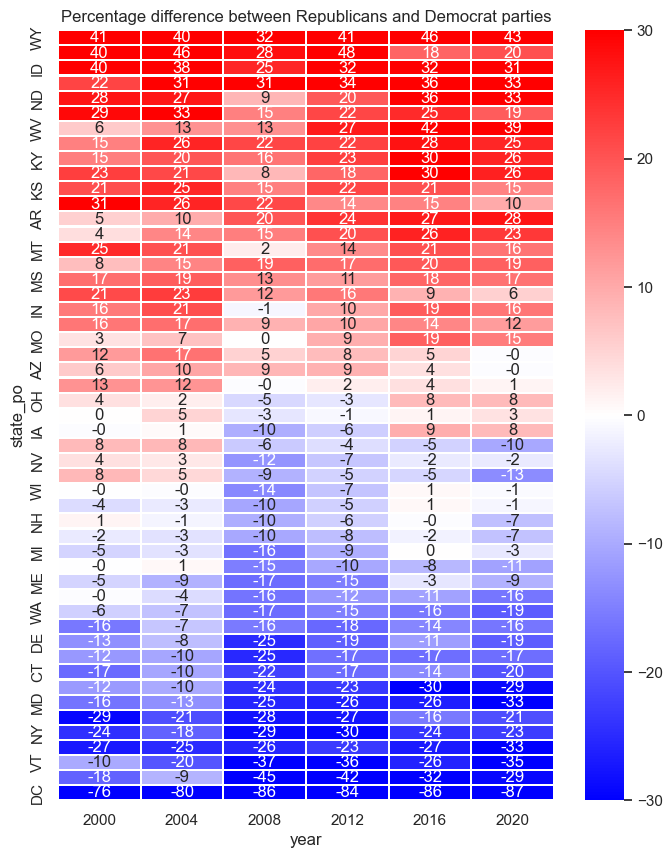

In [16]:
# display heatmap showing the percentages of voters for republicans (red) and democrats (blue) for each state for each election year
plt.figure(figsize=(8,10))
sns.heatmap(data=delta_df.sort_values(by='Average',ascending=False).drop('Average',axis=1),linewidths=0.8,cmap='bwr',vmax=30,vmin=-30,center=0, annot=True,fmt='.0f').set_title('Percentage difference between Republicans and Democrat parties');

Here, we can identify three top 5 :

    - Top 5 most Republican states
    - Top 5 most Democrat states
    - Top 5 most swing states (states that hesitate the most for which parti to vote for)

In [17]:
# top 5 most republican states
rep_df = rep_year_score_df.sort_values(by='Average',ascending=False).head(5)

# top 5 most democrat states
dem_df = dem_year_score_df.sort_values(by='Average',ascending=False).head(5)

## 4. Data refinement

In this section, we will discuss our choice of removing some features and some ratings elements due to the quality of the data and the needs we have for it.

TODO Discuter de quelles données on veut supprimer !!

### 3.1 Dropping ratings with the user's location not available (NaN)

In [18]:
# see how much data will be lost by dropping NaN for user_location
BA_unavailable_user_loc = BA_cleaned['user_location'].isna().mean() * 100
RB_unavailable_user_loc  = RB_cleaned['user_location'].isna().mean() * 100

print(f'BeerAdvocate cleaned dataframe (BA_cleaned) has {BA_unavailable_user_loc:.1f}% unavailable data for user location')
print(f'RateBeer cleaned dataframe (RB_cleaned) has {RB_unavailable_user_loc:.1f}% unavailable data for user location')

BeerAdvocate cleaned dataframe (BA_cleaned) has 6.0% unavailable data for user location
RateBeer cleaned dataframe (RB_cleaned) has 2.9% unavailable data for user location


Here, we can see that the amount of data that will get discarded is not negligeable but doesn't affect too much our dataset too. The contry in which the ratings where made is crucial for our analysis, so we decided to remove the ratings where the country field is missing.

In [19]:
# dropping the elements with no user_location
BA_refined = BA_cleaned.dropna(subset = ['user_location'])
RB_refined = RB_cleaned.dropna(subset = ['user_location'])

### 3.2 Create dataframe of only US users

In [20]:
# create Dataframe of only USA users
BA_usa = BA_refined.copy()[BA_cleaned['user_country'].str.contains('United States', case=False, na=False)]
RB_usa = RB_refined.copy()[RB_cleaned['user_country'].str.contains('United States', case=False, na=False)]

c:\Users\41774\anaconda3_2\envs\ada\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\Users\41774\anaconda3_2\envs\ada\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


## 5. Analysis : Relation Beer vs Political

### 5.1 DANIEL

2 : Quels états préfèrent consommer local(etat-national?,national-international?)DANIEL

2.1 Quels états donnent la plus haute note?


2.2 mettre en relation avec l'orientation politique  (Relation between main consumption type and political views of each state.)

2.2.1 --> Consommation

2.2.2 --> Rating

### 5.1.1 US states' preferences and their prefered consumption type

In [21]:
# determine if the user is consuming a beer locally (from a brewery in its own state), nationally (US brewery) or internationnally (foreign brewery)
BA_usa['consumption_type'] = BA_usa.apply(lambda a: 
    'Local' if a['user_state'] == a['breweries_state'] else 
    'National' if a['breweries_country'] == 'United States' else 
    'International', axis=1)

In [22]:
# compute what's the average rating for each consumption (Local, National, International) type for each state
state_consumption_stats = BA_usa.groupby(['user_state', 'consumption_type']).agg(
    count=('rating', 'size'),
    consumption_type_avg_rating=('rating', 'mean')
).reset_index()

# compute total consumption count per state to see the % of each consumption type
total_counts_per_state = state_consumption_stats.groupby('user_state')['count'].transform('sum')
state_consumption_stats['percentage'] = (state_consumption_stats['count'] / total_counts_per_state) * 100

# compute overall average rating for each state
state_avg_rating = BA_usa.groupby('user_state')['rating'].mean().reset_index(name='state_avg_rating')

# merge overall average state rating into the main dataframe
state_consumption_stats = state_consumption_stats.merge(state_avg_rating, on='user_state')


# states that prefer local beers
local_preference = state_consumption_stats[state_consumption_stats['consumption_type'] == 'Local']
# states that prefer national beers
national_preference = state_consumption_stats[state_consumption_stats['consumption_type'] == 'National']
# states that prefer international beers
international_preference = state_consumption_stats[state_consumption_stats['consumption_type'] == 'International']

In [23]:
# top states that prefer local consumption
top_local_states = local_preference.sort_values(by='percentage', ascending=False)

# top states that prefer national consumption
top_national_states = national_preference.sort_values(by='percentage', ascending=False)

# top states that prefer international consumption
top_international_states = international_preference.sort_values(by='percentage', ascending=False)

In [24]:
# print for Local consumption
print("Top States for Local Consumption:")
top_local_states.head()

Top States for Local Consumption:


,user_state,consumption_type,count,consumption_type_avg_rating,percentage,state_avg_rating
13,California,Local,310590,4.013138,47.192517,3.937877
64,Michigan,Local,96256,3.906939,39.538953,3.878540
16,Colorado,Local,51669,3.863897,30.233647,3.894112
109,Oregon,Local,30013,3.957360,29.695555,3.892649
133,Vermont,Local,13752,4.089329,27.912075,3.988573


In [25]:
# print for National consumption
print("\nTop States for National Consumption:")
top_national_states.head()


Top States for National Consumption:


,user_state,consumption_type,count,consumption_type_avg_rating,percentage,state_avg_rating
143,West Virginia,National,20744,3.860203,83.537371,3.849827
101,North Dakota,National,6518,3.820578,83.265202,3.808751
122,South Dakota,National,9491,3.752631,81.064230,3.747754
149,Wyoming,National,8879,3.842253,80.600944,3.819800
116,Rhode Island,National,38217,3.945210,80.424672,3.927720


In [26]:
# print for International consumption
print("\nTop States for International Consumption:")
top_international_states.head()


Top States for International Consumption:


,user_state,consumption_type,count,consumption_type_avg_rating,percentage,state_avg_rating
51,Louisiana,International,8546,3.843517,20.657981,3.872486
30,Hawaii,International,1618,3.754951,20.499176,3.844589
3,Alaska,International,2885,3.904731,20.459542,3.939769
105,Oklahoma,International,5877,3.809845,17.526542,3.861029
129,Utah,International,1395,3.684753,17.355063,3.831079


> *We can see that we get three top 5 for each consumption type which we will be using to compare with the top 5 republican/democrat state.*

### 5.2 Samuel
1 : Quels styles de bière les états préfèrent? (faire pour le top5 des states pour chaque parti) 

1.2 : Moyenne du Pourcentage d'alcool sur le top 5 des bières de chaque état parmi le top5 par parti ?


In [27]:
display(BA_usa.sample(0).T)

""
rating_date
rating_appearance
rating_aroma
rating_palate
rating_taste
rating_overall
rating
beer_id
beer_name
beer_style


In [28]:
display(RB_usa.sample(0).T)

""
rating_date
rating_appearance
rating_aroma
rating_palate
rating_taste
rating_overall
rating
beer_id
beer_name
beer_style


In [29]:
#We use BeerAdvocate df here because a high majority of users comes from USA. Observations only on the top5 most republican/democrats states

top5_republican = ['Wyoming','Oklahoma','Idaho', 'Utah','Alabama']
top5_democrat = ['Washington','Hawaii', 'Massachusetts', 'Vermont', 'Maryland']
rep_year_score_df.sort_values(by='Average',ascending=False).head()
dem_year_score_df.sort_values(by='Average',ascending=False).head()



year,2000,2004,2008,2012,2016,2020,Average
state_po,,,,,,,
DC,85.155081,89.183869,92.457110,90.913114,90.483884,92.149694,90.057125
HI,55.791668,54.009552,71.452910,70.147932,60.980798,63.149380,62.588707
MA,59.126126,61.616660,61.363199,60.338308,59.050065,65.122984,61.102890
VT,50.634709,58.937463,67.455683,66.570550,55.722742,65.455781,60.796155
MD,56.488308,55.971761,61.919345,61.974191,60.328549,65.360665,60.340470


In [ ]:
# democrats States
pd_top5_democrat = pd.DataFrame({
    'Top 5':np.arange(1,6)
})
pd_top5_democrat_rating = pd.DataFrame({
    'Top 5':np.arange(1,6)
})
for state in top5_democrat:
    BA_state = BA_usa.copy()[BA_usa['user_state']==str(state)]
    # keep the beer if it has at leat 10 ratings
    counts = BA_state.groupby('beer_id')['rating'].transform('count')
    BA_state = BA_state[counts >= 10]
    top5_state = BA_state[['beer_name','beer_style','breweries_location','rating']].groupby(['beer_style']).agg({'rating': 'mean'}).sort_values('rating',ascending=False)[:5]
    pd_top5_democrat[state] = top5_state.index #add beer styles
    pd_top5_democrat_rating[state] = top5_state.index
    pd_top5_democrat_rating[state+'_rating'] = top5_state['rating'].values #add ratings of beer_styles


# Republican States
pd_top5_republican = pd.DataFrame({
    'Top 5':np.arange(1,6)
})
pd_top5_republican_rating = pd.DataFrame({
    'Top 5':np.arange(1,6)
})
for state in top5_republican:
    BA_state = BA_usa.copy()[BA_usa['user_state']==str(state)]
    # keep the beer if it has at leat 10 ratings
    counts = BA_state.groupby('beer_id')['rating'].transform('count')
    BA_state = BA_state[counts >= 10]
    top5_state = BA_state[['beer_name','beer_style','breweries_location','rating']].groupby(['beer_style']).agg({'rating': 'mean'}).sort_values('rating',ascending=False)[:5]
    pd_top5_republican[state] = top5_state.index
    pd_top5_republican_rating[state] = top5_state.index
    pd_top5_republican_rating[state+'_rating'] = top5_state['rating'].values


In [113]:
display(pd_top5_republican)
display(pd_top5_democrat)

,Top 5,Wyoming,Oklahoma,Idaho,Utah,Alabama
0,1,American Double / Imperial Stout,American Double / Imperial Stout,Quadrupel (Quad),Quadrupel (Quad),Weizenbock
1,2,American Stout,Berliner Weissbier,Tripel,American Double / Imperial Stout,Quadrupel (Quad)
2,3,American Double / Imperial IPA,Quadrupel (Quad),Russian Imperial Stout,American Strong Ale,American Wild Ale
3,4,American Porter,Russian Imperial Stout,American Double / Imperial Stout,Russian Imperial Stout,Gueuze
4,5,American Barleywine,Weizenbock,Saison / Farmhouse Ale,American Brown Ale,American Double / Imperial Stout


,Top 5,Washington,Hawaii,Massachusetts,Vermont,Maryland
0,1,Gueuze,American Double / Imperial Stout,American Double / Imperial Stout,Lambic - Unblended,Gueuze
1,2,American Double / Imperial Stout,Doppelbock,Gueuze,Gueuze,Quadrupel (Quad)
2,3,Lambic - Fruit,American Double / Imperial IPA,American Double / Imperial IPA,American Wild Ale,American Double / Imperial Stout
3,4,English Barleywine,Tripel,Eisbock,Lambic - Fruit,Eisbock
4,5,Quadrupel (Quad),Russian Imperial Stout,Lambic - Fruit,American Double / Imperial IPA,Flanders Red Ale


In [293]:

styles_rep = []
styles_dem = []
for col in top5_republican:
    styles_rep.append(list(pd_top5_republican[col].values))
styles_rep = [item for sous_liste in styles_rep for item in sous_liste]
styles_rep = list(set(styles_rep))

for col in top5_democrat:
    styles_dem.append(list(pd_top5_democrat[col].values))
styles_dem = [item for sous_liste in styles_dem for item in sous_liste]
styles_dem = list(set(styles_dem))

#keep the values that need to be added

styles = list(set(styles_dem+styles_rep))
print(styles)

['American Wild Ale', 'American Double / Imperial Stout', 'Gueuze', 'Lambic - Fruit', 'Eisbock', 'Quadrupel (Quad)', 'American Double / Imperial IPA', 'Tripel', 'Flanders Red Ale', 'American Stout', 'Doppelbock', 'American Porter', 'American Barleywine', 'Russian Imperial Stout', 'American Brown Ale', 'English Barleywine', 'Lambic - Unblended', 'Weizenbock', 'American Strong Ale', 'Berliner Weissbier', 'Saison / Farmhouse Ale']


In [295]:
#add the style from top5 republican to democrat and vice versa (for the plot)
# democrats States

pd_top_democrat_rating = pd.DataFrame({
    'Top 5':np.arange(1,27)
})
for state in top5_democrat:
    BA_state = BA_usa.copy()[BA_usa['user_state']==str(state)]
    # keep the beer if it has at leat 10 ratings
    counts = BA_state.groupby('beer_id')['rating'].transform('count')
    BA_state = BA_state[counts >= 10]
    top_state = BA_state[['beer_name','beer_style','breweries_location','rating']].groupby(['beer_style']).agg({'rating': 'mean'}).sort_values('rating',ascending=False)
    for style in styles:
        if style in top_state.index:
            pass
        else:
            top_state.loc[style] = None
    top_state = pd.concat([top_state.head(5), top_state.loc[styles]])
    #add beer styles
    pd_top_democrat_rating[state] = top_state.index
    pd_top_democrat_rating[state+'_rating'] = top_state['rating'].values #add ratings of beer_styles


# Republican States

pd_top_republican_rating = pd.DataFrame({
    'Top 5':np.arange(1,27)
})
for state in top5_republican:
    BA_state = BA_usa.copy()[BA_usa['user_state']==str(state)]
    # keep the beer if it has at leat 10 ratings
    counts = BA_state.groupby('beer_id')['rating'].transform('count')
    BA_state = BA_state[counts >= 10]
    top_state = BA_state[['beer_name','beer_style','breweries_location','rating']].groupby(['beer_style']).agg({'rating': 'mean'}).sort_values('rating',ascending=False)
    for style in styles:
        if style in top_state.index:
            pass
        else:
            top_state.loc[style] = None
    top_state = pd.concat([top_state.head(5), top_state.loc[styles]])
    #add beer styles
    pd_top_republican_rating[state] = top_state.index
    pd_top_republican_rating[state+'_rating'] = top_state['rating'].values

In [296]:
display(pd_top_republican_rating)
#display(pd_top_democrat_rating['Washington'])


,Top 5,Wyoming,Wyoming_rating,Oklahoma,Oklahoma_rating,Idaho,Idaho_rating,Utah,Utah_rating,Alabama,Alabama_rating
0,1,American Double / Imperial Stout,4.751667,American Double / Imperial Stout,4.381819,Quadrupel (Quad),4.526667,Quadrupel (Quad),4.464167,Weizenbock,4.370952
1,2,American Stout,4.449091,Berliner Weissbier,4.314444,Tripel,4.339375,American Double / Imperial Stout,4.460833,Quadrupel (Quad),4.351289
2,3,American Double / Imperial IPA,4.286329,Quadrupel (Quad),4.306113,Russian Imperial Stout,4.334603,American Strong Ale,4.435455,American Wild Ale,4.342609
3,4,American Porter,4.270000,Russian Imperial Stout,4.273849,American Double / Imperial Stout,4.327829,Russian Imperial Stout,4.331818,Gueuze,4.331429
4,5,American Barleywine,4.189231,Weizenbock,4.268644,Saison / Farmhouse Ale,4.297000,American Brown Ale,4.295000,American Double / Imperial Stout,4.325558
5,6,American Wild Ale,NaN,American Wild Ale,4.192308,American Wild Ale,NaN,American Wild Ale,NaN,American Wild Ale,4.342609
6,7,American Double / Imperial Stout,4.751667,American Double / Imperial Stout,4.381819,American Double / Imperial Stout,4.327829,American Double / Imperial Stout,4.460833,American Double / Imperial Stout,4.325558
7,8,Gueuze,NaN,Gueuze,4.240256,Gueuze,NaN,Gueuze,NaN,Gueuze,4.331429
8,9,Lambic - Fruit,NaN,Lambic - Fruit,4.126167,Lambic - Fruit,NaN,Lambic - Fruit,NaN,Lambic - Fruit,3.974545
9,10,Eisbock,NaN,Eisbock,4.015862,Eisbock,NaN,Eisbock,NaN,Eisbock,4.306897


In [297]:

# new long format to plot
republican_long = pd.melt(pd_top_republican_rating, id_vars=['Top 5'], value_vars=['Wyoming', 'Oklahoma', 'Idaho', 'Utah', 'Alabama'],
                          var_name='State', value_name='Beer style')
democrat_long = pd.melt(pd_top_democrat_rating, id_vars=['Top 5'], value_vars=['Washington','Hawaii', 'Massachusetts', 'Vermont', 'Maryland'],
                          var_name='State', value_name='Beer style')

# create a new column rating
republican_long['Rating'] = pd.melt(pd_top_republican_rating, id_vars=['Top 5'], value_vars=['Wyoming_rating', 'Oklahoma_rating', 'Idaho_rating', 'Utah_rating', 'Alabama_rating'],
                                    var_name='State_rating', value_name='Rating')['Rating']
democrat_long['Rating'] = pd.melt(pd_top_democrat_rating, id_vars=['Top 5'], value_vars=['Washington_rating','Hawaii_rating', 'Massachusetts_rating', 'Vermont_rating', 'Maryland_rating'],
                                    var_name='State_rating', value_name='Rating')['Rating']

# add column 'state type'
republican_long['State type'] = 'Republican'
democrat_long['State type'] = 'Democrat'


# combine the dfs
df_combined = pd.concat([republican_long, democrat_long])
#display(df_combined[60:120])
df_combined = df_combined.drop_duplicates(subset=('State','Beer style'))
df_combined[(df_combined['State type']== 'Republican')&(df_combined['Beer style']=='American IPA')]

,Top 5,State,Beer style,Rating,State type


21.0


c:\Users\41774\anaconda3_2\envs\ada\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\41774\anaconda3_2\envs\ada\lib\site-packages\numpy\lib\nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


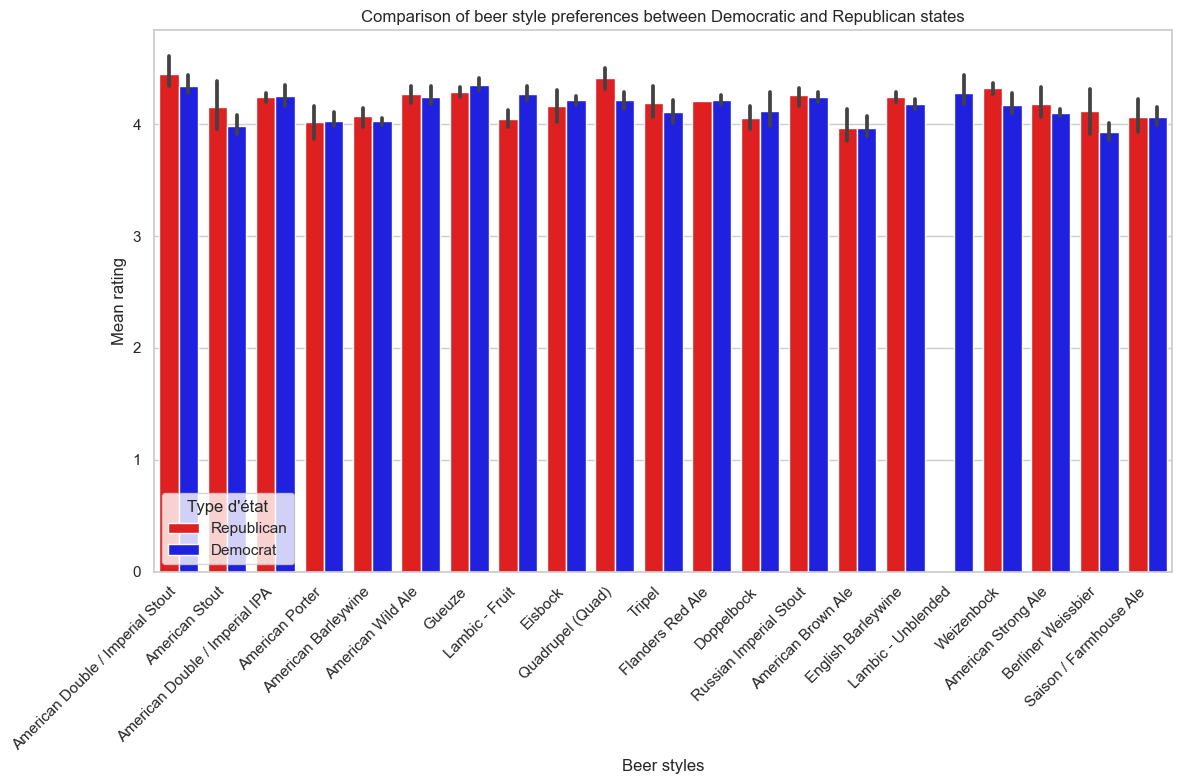

In [298]:
print(len(df_combined)/10)
# Créer le graphique
plt.figure(figsize=(12, 8))
sns.barplot(data=df_combined, x='Beer style', y='Rating', hue ='State type',palette={'Democrat': 'blue', 'Republican': 'red'})

# Personnaliser le graphique
plt.title('Comparison of beer style preferences between Democratic and Republican states')
plt.xlabel('Beer styles')
plt.ylabel('Mean rating')
plt.xticks(rotation=45, ha='right')  # Rotation des labels de l'axe x pour meilleure lisibilité
plt.legend(title='Type d\'état')

# Afficher le graphique
plt.tight_layout()
plt.show()

In [210]:
### The Lambic Unblended has no value for the republican states because it doesn't have enough reviews.
#Why not analyze the popularity then, i.e nb of reviews ? 

In [299]:

df_test_rep = BA_usa[BA_usa['user_state'].isin(top5_republican)]
df_test_dem = BA_usa[BA_usa['user_state'].isin(top5_democrat)]
#df_test_rep[df_test_rep['beer_style']=='American Double / Imperial IPA']
print('Mean rating for Republican states\n',df_test_rep.groupby('beer_style').agg({'rating':'mean'}).loc['Lambic - Unblended'],'\n')
print('Mean rating for Democrat states\n',df_test_dem.groupby('beer_style').agg({'rating':'mean'}).loc['Lambic - Unblended'])

Mean rating for Republican states
 rating    4.162051
Name: Lambic - Unblended, dtype: float64 

Mean rating for Democrat states
 rating    4.167143
Name: Lambic - Unblended, dtype: float64


In [ ]:
#All beer styles in top 7 count for all states
rep_styles =[]
dem_styles =[]

for state in top5_democrat:
    BA_state = BA_usa.copy()[BA_usa['user_state']==str(state)]    
    top_state_count = BA_state[['beer_name','beer_style','breweries_location','rating']].groupby(['beer_style']).agg({'rating': 'count'}).sort_values('rating',ascending=False)
    top5_style = list(top_state_count.head(7).index)
    dem_styles.append(top5_style)
for state in top5_republican:
    BA_state = BA_usa.copy()[BA_usa['user_state']==str(state)]
    top_state_count = BA_state[['beer_name','beer_style','breweries_location','rating']].groupby(['beer_style']).agg({'rating': 'count'}).sort_values('rating',ascending=False)
    top5_style = list(top_state_count.head(7).index)
    rep_styles.append(top5_style)

dem_styles = [item for sous_liste in dem_styles for item in sous_liste]
rep_styles = [item for sous_liste in rep_styles for item in sous_liste]

styles = list(set(rep_styles))+list(set(dem_styles))
print(styles)

['American Pale Ale (APA)', 'Russian Imperial Stout', 'American Double / Imperial IPA', 'American IPA', 'American Double / Imperial Stout', 'Saison / Farmhouse Ale', 'American Porter', 'American Amber / Red Ale', 'American Pale Ale (APA)', 'Russian Imperial Stout', 'American Double / Imperial IPA', 'American Wild Ale', 'American IPA', 'American Double / Imperial Stout', 'Saison / Farmhouse Ale', 'American Porter', 'American Amber / Red Ale']


In [309]:
# democrats States

pd_top_democrat_count = pd.DataFrame({
    'Top 5':np.arange(1,25)
})
for state in top5_democrat:
    BA_state = BA_usa.copy()[BA_usa['user_state']==str(state)]    
    top_state_count = BA_state[['beer_name','beer_style','breweries_location','rating']].groupby(['beer_style']).agg({'rating': 'count'}).sort_values('rating',ascending=False)

    top_state_count = pd.concat([top_state_count.head(7), top_state_count.loc[styles]])
    #add beer styles
    pd_top_democrat_count[state] = top_state_count.index
    pd_top_democrat_count[state+'_count'] = top_state_count['rating'].values #add ratings of beer_styles


# Republican States

pd_top_republican_count = pd.DataFrame({
    'Top 5':np.arange(1,25)
})
for state in top5_republican:
    BA_state = BA_usa.copy()[BA_usa['user_state']==str(state)]
    
    top_state_count = BA_state[['beer_name','beer_style','breweries_location','rating']].groupby(['beer_style']).agg({'rating': 'count'}).sort_values('rating',ascending=False)
    top_state_count = pd.concat([top_state_count.head(7), top_state_count.loc[styles]])
    #add beer styles
    pd_top_republican_count[state] = top_state_count.index
    pd_top_republican_count[state+'_count'] = top_state_count['rating'].values

In [310]:
#percentage of pop because imbalance in data
for state in top5_republican:
    pd_top_republican_count[state+'_count'] = pd_top_republican_count[state+'_count']/pd_top_republican_count[state+'_count'].sum()
for state in top5_democrat:
    pd_top_democrat_count[state+'_count'] = pd_top_democrat_count[state+'_count']/pd_top_democrat_count[state+'_count'].sum()
display(pd_top_republican_count)
display(pd_top_democrat_count)

,Top 5,Wyoming,Wyoming_count,Oklahoma,Oklahoma_count,Idaho,Idaho_count,Utah,Utah_count,Alabama,Alabama_count
0,1,American IPA,0.094411,American IPA,0.083186,American IPA,0.102397,American IPA,0.102014,American IPA,0.100255
1,2,American Double / Imperial IPA,0.053510,American Double / Imperial Stout,0.057252,American Double / Imperial IPA,0.059771,American Double / Imperial IPA,0.064731,American Double / Imperial IPA,0.061265
2,3,American Pale Ale (APA),0.043054,American Double / Imperial IPA,0.057107,American Pale Ale (APA),0.043533,American Pale Ale (APA),0.049087,American Double / Imperial Stout,0.040940
3,4,American Double / Imperial Stout,0.036288,American Pale Ale (APA),0.035103,American Double / Imperial Stout,0.032434,American Double / Imperial Stout,0.032131,American Pale Ale (APA),0.037195
4,5,American Porter,0.032444,Saison / Farmhouse Ale,0.034691,American Porter,0.027597,American Amber / Red Ale,0.027635,American Porter,0.026482
5,6,American Amber / Red Ale,0.028216,American Amber / Red Ale,0.022755,American Amber / Red Ale,0.027251,American Porter,0.021920,Russian Imperial Stout,0.025884
6,7,Russian Imperial Stout,0.023680,Russian Imperial Stout,0.021931,Saison / Farmhouse Ale,0.022069,Saison / Farmhouse Ale,0.021358,Saison / Farmhouse Ale,0.022680
7,8,American Pale Ale (APA),0.043054,American Pale Ale (APA),0.035103,American Pale Ale (APA),0.043533,American Pale Ale (APA),0.049087,American Pale Ale (APA),0.037195
8,9,Russian Imperial Stout,0.023680,Russian Imperial Stout,0.021931,Russian Imperial Stout,0.018700,Russian Imperial Stout,0.015457,Russian Imperial Stout,0.025884
9,10,American Double / Imperial IPA,0.053510,American Double / Imperial IPA,0.057107,American Double / Imperial IPA,0.059771,American Double / Imperial IPA,0.064731,American Double / Imperial IPA,0.061265


,Top 5,Washington,Washington_count,Hawaii,Hawaii_count,Massachusetts,Massachusetts_count,Vermont,Vermont_count,Maryland,Maryland_count
0,1,American IPA,0.093484,American IPA,0.097769,American IPA,0.095915,American IPA,0.093364,American IPA,0.094906
1,2,American Double / Imperial IPA,0.062129,American Double / Imperial IPA,0.067852,American Double / Imperial IPA,0.076137,American Double / Imperial IPA,0.083673,American Double / Imperial IPA,0.071001
2,3,American Double / Imperial Stout,0.041462,American Double / Imperial Stout,0.039683,American Double / Imperial Stout,0.037540,American Pale Ale (APA),0.034994,American Double / Imperial Stout,0.039576
3,4,American Pale Ale (APA),0.034923,American Pale Ale (APA),0.033721,American Pale Ale (APA),0.035362,Saison / Farmhouse Ale,0.033572,American Pale Ale (APA),0.034667
4,5,Saison / Farmhouse Ale,0.032374,American Porter,0.031459,Saison / Farmhouse Ale,0.029797,American Double / Imperial Stout,0.032707,Saison / Farmhouse Ale,0.030443
5,6,American Wild Ale,0.027931,American Amber / Red Ale,0.023851,American Porter,0.021465,American Porter,0.020702,American Porter,0.022259
6,7,American Porter,0.023532,Russian Imperial Stout,0.021692,American Wild Ale,0.020928,American Wild Ale,0.019319,American Wild Ale,0.022086
7,8,American Pale Ale (APA),0.034923,American Pale Ale (APA),0.033721,American Pale Ale (APA),0.035362,American Pale Ale (APA),0.034994,American Pale Ale (APA),0.034667
8,9,Russian Imperial Stout,0.020653,Russian Imperial Stout,0.021692,Russian Imperial Stout,0.019562,Russian Imperial Stout,0.015895,Russian Imperial Stout,0.019579
9,10,American Double / Imperial IPA,0.062129,American Double / Imperial IPA,0.067852,American Double / Imperial IPA,0.076137,American Double / Imperial IPA,0.083673,American Double / Imperial IPA,0.071001


In [311]:
# new long format to plot
republican_long = pd.melt(pd_top_republican_count, id_vars=['Top 5'], value_vars=['Wyoming', 'Oklahoma', 'Idaho', 'Utah', 'Alabama'],
                          var_name='State', value_name='Beer style')
democrat_long = pd.melt(pd_top_democrat_count, id_vars=['Top 5'], value_vars=['Washington','Hawaii', 'Massachusetts', 'Vermont', 'Maryland'],
                          var_name='State', value_name='Beer style')

# create a new column rating
republican_long['Count'] = pd.melt(pd_top_republican_count, id_vars=['Top 5'], value_vars=['Wyoming_count', 'Oklahoma_count', 'Idaho_count', 'Utah_count', 'Alabama_count'],
                                    var_name='State_rating', value_name='Count of rating')['Count of rating']
democrat_long['Count'] = pd.melt(pd_top_democrat_count, id_vars=['Top 5'], value_vars=['Washington_count','Hawaii_count', 'Massachusetts_count', 'Vermont_count', 'Maryland_count'],
                                    var_name='State_rating', value_name='Count of rating')['Count of rating']

# add column 'state type'
republican_long['State type'] = 'Republican'
democrat_long['State type'] = 'Democrat'


# combine the dfs
df_combined = pd.concat([republican_long, democrat_long])
#df_combined[:60]
df_combined = df_combined.drop_duplicates(subset=('State','Beer style'))
df_combined[(df_combined['State type']== 'Republican')&(df_combined['Beer style']=='American Amber / Red Ale')]

,Top 5,State,Beer style,Count,State type
5,6,Wyoming,American Amber / Red Ale,0.028216,Republican
29,6,Oklahoma,American Amber / Red Ale,0.022755,Republican
53,6,Idaho,American Amber / Red Ale,0.027251,Republican
76,5,Utah,American Amber / Red Ale,0.027635,Republican
110,15,Alabama,American Amber / Red Ale,0.021869,Republican


9.0


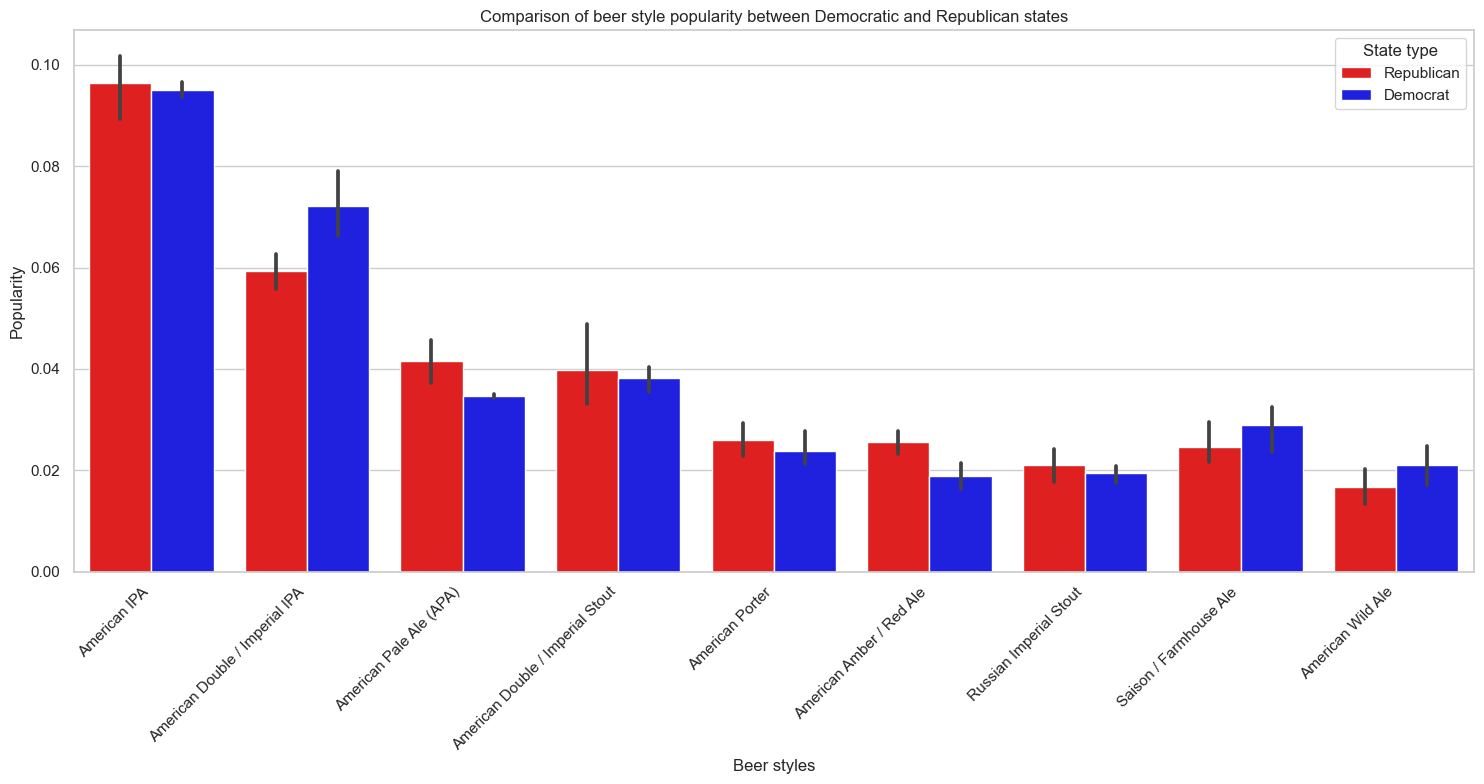

In [312]:
print(len(df_combined)/10)
# Créer le graphique
plt.figure(figsize=(15, 8))
sns.barplot(data=df_combined, x='Beer style', y='Count', hue ='State type',palette={'Democrat': 'blue', 'Republican': 'red'})

# Personnaliser le graphique
plt.title('Comparison of beer style popularity between Democratic and Republican states')
plt.xlabel('Beer styles')
plt.ylabel('Popularity')
plt.xticks(rotation=45, ha='right')  # Rotation des labels de l'axe x pour meilleure lisibilité
plt.legend(title='State type')

# Afficher le graphique
plt.tight_layout()
plt.show()

In [ ]:
### Only small differences in beer popularity.

In [ ]:
#QUESTIONS :
# 1 : Quels styles de bière les états préfèrent? (selon parti) SAMUEL
# 1.2 : Pourcentage d'alcool ?

# 2 : Quels états préfèrent consommer local(etat-national?,national-international?)DANIEL
# 2.1 mettre en relation avec l'orientation politique


# EN DESSOUS, Cellules de tests, à retirer !!!

In [ ]:
from importlib import reload
import helpers
reload(helpers)

<module 'helpers' from '/Users/jackdouniels/Downloads/GitHub/ada-2024-project-casiervert952/helpers.py'>